<a href="https://colab.research.google.com/github/tugce999/audio-classification/blob/main/human_audio_classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import librosa
import librosa.display
import numpy as np
import math

In [ ]:
# ffmpeg modülü çalışmıyorsa alttaki kodu deneyebilirsiniz
#AudioSegment.ffmpeg = r"C:\Program Files\ffmpeg-5.0.1-essentials_build\bin\ffmpeg"

# WAV Dosyasına Çevirme

In [ ]:
from os.path import exists
from pydub import AudioSegment
# m4a formatında kaydedilen ses dosyalarını wav dosyalarına dönüştürmeye yarıyan fonksiyon
def convert_m4a_wav(m4a_filename):
    m4a_file = m4a_filename
    filename = m4a_filename.split('.')[0] 
    wav_filename = filename+'.wav'
    track = AudioSegment.from_file(m4a_file,  format= 'm4a')
    if not exists(wav_filename): # wav dosyası mevcutmu diye kontrol et!
        print("Wav file is being downloaded")
        file_handle = track.export(wav_filename, format='wav')
        MY_FILE = file_handle.name
    else:
        print("There is "+wav_filename)
    MY_FILE = os.getcwd()+"\\"+wav_filename
    return MY_FILE

In [ ]:

def convert_all(data_path):
    for dirpath, dirnames, filenames in os.walk(data_path):
        # people klasörünün altındaki kişilerin m4a formatındaki ses dosyalarını wav haline getirir.
        for f in filenames:
            # load audio file
            file_path = os.path.join(dirpath, f)
            if file_path.endswith('.m4a'):
                print(file_path)
                convert_m4a_wav(file_path)

In [ ]:
DATASET_PATH = r"predata\\"
convert_all(DATASET_PATH)

predata\\bera\bera1.m4a
There is predata\\bera\bera1.wav
predata\\faruk\faruk1.m4a
There is predata\\faruk\faruk1.wav
predata\\faruk\faruk2.m4a
There is predata\\faruk\faruk2.wav
predata\\faruk\faruk3.m4a
There is predata\\faruk\faruk3.wav
predata\\faruk\faruk4.m4a
There is predata\\faruk\faruk4.wav
predata\\faruk\faruk5.m4a
There is predata\\faruk\faruk5.wav
predata\\Osman\Kayıt (10).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (11).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (12).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (13).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (2).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (3).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (4).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (5).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (6).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (7).m4a
Wav file is being downloaded
predata\\Osman\Kayıt (8).m4a
Wav file is being downloa

In [ ]:
import IPython.display as ipd
MY_FILE = r"predata\Osman\Kayıt.wav"
# Ses verisini oynatmayı sağlarlar.
AudioSegment.from_file(file=MY_FILE, format="wav") # Yöntem 1
ipd.Audio(MY_FILE) # Yöntem 2

# LIBROSA

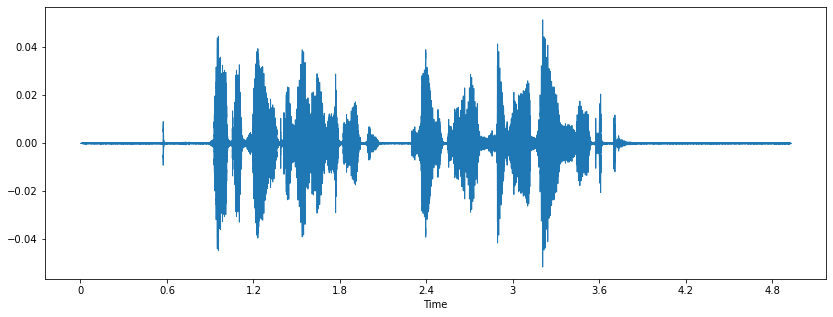

In [ ]:
plt.figure(figsize=(14,5))
# Librosa alınan wav dosyasını okuyup sinyal yani data ve sample rate değerlerini döner.
# data = 1D numpy array ve sample rate ile T (duration) değerlerinin çarpılması sonucu oluşan değer kadar veri sayısı barındırır.
data,sample_rate=librosa.load(MY_FILE,sr=22050)
librosa.display.waveshow(data,sr=sample_rate)

In [ ]:
sample_rate

22050

Ses ile ilgili "sample rate" ve verinin içeriğini görebilmek için scipy kütüphanesini kullanıyoruz.

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(MY_FILE)

In [ ]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [ ]:
librosa_audio_data,librosa_sample_rate=librosa.load(MY_FILE)
print(librosa_audio_data)

[-1.7314668e-10  3.4625050e-10 -5.9974653e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


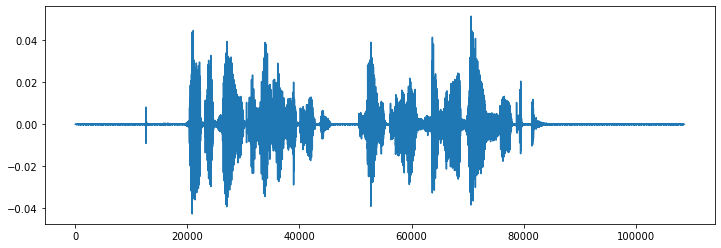

In [ ]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(MY_FILE) 

In [ ]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

Burada Librosa sinyali "mono" sinyale çevirerek channel parametresinin 1 olmasını sağlıyor. Bizim örneğimizde iki farklı grafiğin görünmemesinin nedeni önceden uğraştığımız verininde "mono" bir sinyal olmasından kaynaklıdır.

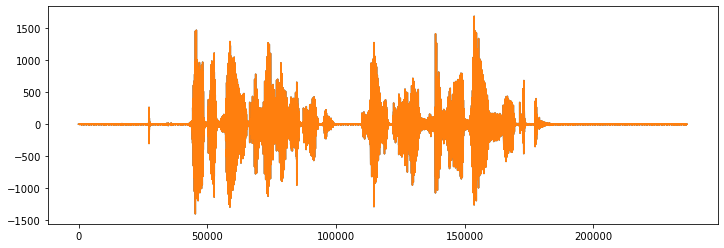

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Özellik Çıkarma (Feature Extraction)

In [ ]:
data.shape

(108663,)

In [ ]:
# FFT -> power spectrum
# Fourier transform uygula
fft = np.fft.fft(data)
# magnitude değerlerini alabilmek için fft sonucu elde edilen karmaşık sayıların absolute değerlerini al.
spectrum = np.abs(fft)

In [ ]:
# frekans değerini oluştur
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

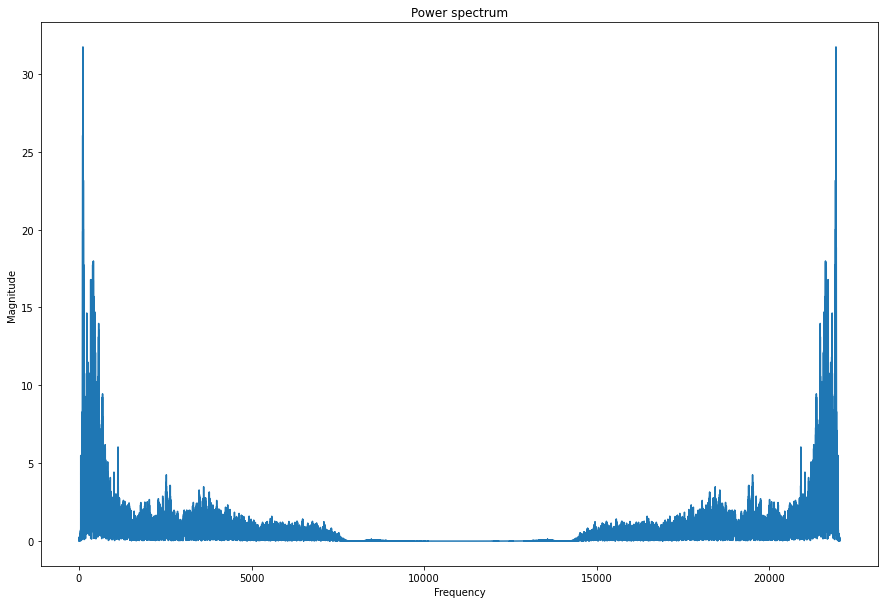

In [ ]:
# plot spectrum
plt.figure(figsize=(15,10))
plt.plot(f, spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# Yukarıdaki grafikten anlaşılacağı üzere sağ taraf sol tarafın yansıması şeklindedir.
# Bu nedenle veriyi işlerken kullanacağımız spectrum değerleri sol taraftaki kısım olacaktır.
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
spectrum = left_spectrum
f = left_f

Text(0.5, 1.0, 'Power spectrum')

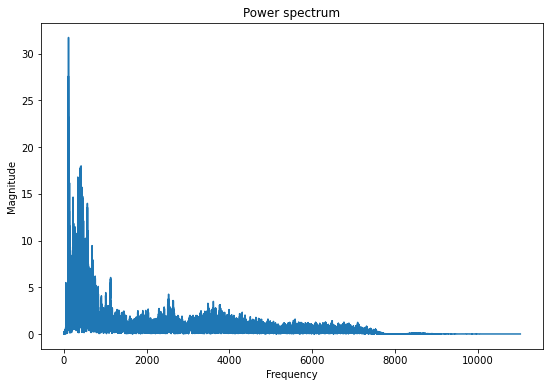

In [ ]:
# plot spectrum
plt.figure(figsize=(9,6))
plt.plot(f, spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
SAMPLE_RATE = sample_rate
SAMPLE_RATE

22050

In [ ]:
# STFT -> spectrogram
hop_length = 512 # fourier transforma girecek verilerin bölüm bölüm taranırken sağa tarafa doğru ne kadarlık bir kayma olacağı
n_fft = 2048 # bir fourier transforma girecek veri sayısı

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


## STFT (Short Time Fourier Transform)

Birden fazlas fourier transformu faklı zaman aralıkları için hesaplar. Frame size olarak adlandırdığımız değişmeyen bir değişken vardır. Örneğin 2048 örnekte bir fourier transform uygulanır. Buradaki 2048e de biz frame size diyebiliriz.

In [ ]:
# perform stft
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

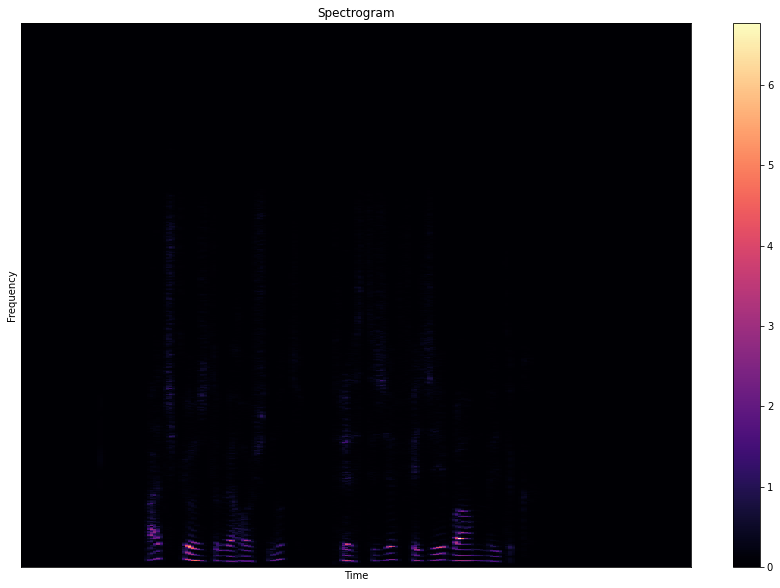

In [ ]:
# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Yukarıdaki grafiği incelemek biraz zor fakat yinede düşük frekans değerlerinde belirli yoğunluklar görebiliyoruz. Daha anlaşılır bır grafik için amplitude değerlerini db değerlerine çeviricez. Bunuda logaritma alarak yapıyoruz.

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

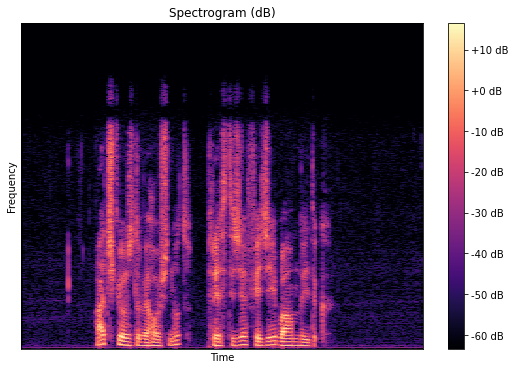

In [ ]:
plt.figure(figsize=(9,6))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs
# 13 MFCC özelliği ses tanıma için yeterli olacaktır.
MFCCs = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

In [ ]:
MFCCs.shape

(13, 213)

In [ ]:
mfccs_scaled_features = np.mean(MFCCs.T,axis=0)

# Ses Dosya Boyutlarını Eşitle (ÖN İŞLEME)

In [ ]:
os.getcwd()

'C:\\Users\\faruk\\Desktop\\AudioClassifier'

In [ ]:
def get_wav_file_duration_in_seconds(file_path):
    audio = AudioSegment.from_file(file_path)
    audio.duration_seconds == (len(audio) / 1000.0)
    print("{} audio file is {} seconds".format(file_path,audio.duration_seconds))
    return audio.duration_seconds

In [ ]:
file_name = r"C:\Users\faruk\Desktop\AudioClassifier\predata\bera\bera1.wav"
newAudio = AudioSegment.from_wav(file_name)
TRACK_DURATION = get_wav_file_duration_in_seconds(file_name)
TRACK_DURATION = TRACK_DURATION*1000
newAudio = newAudio[:-4000]
new_file_name = "deneme.wav" 
newAudio.export(new_file_name, format="wav")

C:\Users\faruk\Desktop\AudioClassifier\predata\bera\bera1.wav audio file is 7.061333333333334 seconds


<_io.BufferedRandom name='deneme.wav'>

In [ ]:
# Tüm ses dosyalarının sürelerini aynı olmalarını sağlamak gerekiyor.
# Eğer aynı boyutta olmazlarsa boyut açısından modelin eğitmesi açısından problem oluşturuyor.
# Verileri 10 saniyeye göre ayarla 10 saniyeden daha kısa ses kayıtlarını 
PATH = r'predata\\'
SAVE_PATH = r'data\\people\\'
from pydub import AudioSegment
for dirpath, dirnames, filenames in os.walk(PATH):
    
    person_file_count = 0
    for f in filenames:
        # load audio file
        file_path = os.path.join(dirpath, f)
        if file_path.endswith('.wav'):
            
            person_name = str(file_path).split('\\')[2]
            print(person_name)
            newAudio = AudioSegment.from_wav(file_path)
            
            if not os.path.exists(SAVE_PATH+person_name):
                print("yok")
                os.makedirs(SAVE_PATH+person_name)
                
            
            signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
            signal_length = signal.shape[0]
            # Samples per segment burada belirle
            TRACK_DURATION = get_wav_file_duration_in_seconds(file_path)
            TRACK_DURATION_MILLI_SECONDS = TRACK_DURATION*1000
            part_count = math.ceil(TRACK_DURATION / 4)
            print(part_count," adet bölüme ayrılacaktır.")
            
            for i in range(part_count):
                
                new_file_name = r"{base_dir}{person_name}\\{file_name}{filenumber}.wav".format(base_dir=SAVE_PATH,person_name=person_name,
                                                                                             file_name=person_name,filenumber=person_file_count)
                person_file_count+=1
                print(new_file_name)
                FILE_MILLI_SECOND = 3000 # millisecond cinsinden 3 saniye
                second = i * FILE_MILLI_SECOND 
                
                if second+FILE_MILLI_SECOND <= TRACK_DURATION_MILLI_SECONDS:

                    newAudioToSave = newAudio[second:second+FILE_MILLI_SECOND]
                    newAudioToSave.export(new_file_name, format="wav")
                    new_file_track_duration = get_wav_file_duration_in_seconds(new_file_name)
                    
                else:
                    newAudioToSave = newAudio[-FILE_MILLI_SECOND:]
                    newAudioToSave.export(new_file_name, format="wav")
                    new_file_track_duration = get_wav_file_duration_in_seconds(new_file_name)
                    
                    

bera
predata\\bera\bera1.wav audio file is 7.061333333333334 seconds
2  adet bölüme ayrılacaktır.
data\\people\\bera\\bera0.wav
data\\people\\bera\\bera0.wav audio file is 3.0 seconds
data\\people\\bera\\bera1.wav
data\\people\\bera\\bera1.wav audio file is 3.0 seconds
faruk
predata\\faruk\faruk1.wav audio file is 9.386666666666667 seconds
3  adet bölüme ayrılacaktır.
data\\people\\faruk\\faruk0.wav
data\\people\\faruk\\faruk0.wav audio file is 3.0 seconds
data\\people\\faruk\\faruk1.wav
data\\people\\faruk\\faruk1.wav audio file is 3.0 seconds
data\\people\\faruk\\faruk2.wav
data\\people\\faruk\\faruk2.wav audio file is 3.0 seconds
faruk
predata\\faruk\faruk2.wav audio file is 16.106666666666666 seconds
5  adet bölüme ayrılacaktır.
data\\people\\faruk\\faruk3.wav
data\\people\\faruk\\faruk3.wav audio file is 3.0 seconds
data\\people\\faruk\\faruk4.wav
data\\people\\faruk\\faruk4.wav audio file is 3.0 seconds
data\\people\\faruk\\faruk5.wav
data\\people\\faruk\\faruk5.wav audio file is

data\\people\\Selim\\Selim14.wav audio file is 3.0 seconds
data\\people\\Selim\\Selim15.wav
data\\people\\Selim\\Selim15.wav audio file is 3.0 seconds
Selim
predata\\Selim\Kayıt (8).wav audio file is 7.850666666666666 seconds
2  adet bölüme ayrılacaktır.
data\\people\\Selim\\Selim16.wav
data\\people\\Selim\\Selim16.wav audio file is 3.0 seconds
data\\people\\Selim\\Selim17.wav
data\\people\\Selim\\Selim17.wav audio file is 3.0 seconds
Selim
predata\\Selim\Kayıt (9).wav audio file is 7.488 seconds
2  adet bölüme ayrılacaktır.
data\\people\\Selim\\Selim18.wav
data\\people\\Selim\\Selim18.wav audio file is 3.0 seconds
data\\people\\Selim\\Selim19.wav
data\\people\\Selim\\Selim19.wav audio file is 3.0 seconds
Selim
predata\\Selim\Kayıt.wav audio file is 8.042666666666667 seconds
3  adet bölüme ayrılacaktır.
data\\people\\Selim\\Selim20.wav
data\\people\\Selim\\Selim20.wav audio file is 3.0 seconds
data\\people\\Selim\\Selim21.wav
data\\people\\Selim\\Selim21.wav audio file is 3.0 seconds
d

# MFCC ÖZELLİĞİNİ KAYDET

In [ ]:
# Constant değerleri tanımla
DATASET_PATH = r"data\\"
JSON_PATH = "data_voices.json"
SAMPLE_RATE = 22050

In [ ]:
def get_wav_file_duration_in_seconds(file_path):
    audio = AudioSegment.from_file(file_path)
    audio.duration_seconds == (len(audio) / 1000.0)
    print("{} audio file is {} seconds".format(file_path,audio.duration_seconds))
    return audio.duration_seconds

In [ ]:
def process_segments(file_path,label,data,signal,num_segments,samples_per_segment,
                     sample_rate,num_mfcc,n_fft,hop_length,
                     num_mfcc_vectors_per_segment):
    """
    
    """
    for d in range(num_segments):

        # şu an üzerinde işlem yapılan segment için başlangıç ve bitiş noktaları oluştur.
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # mfcc özelliğini çıkar.
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        
        if len(mfcc) == num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(label-1)
            print("{}, segment:{}".format(file_path, d+1))
        print("MFCC shape: ",mfcc.shape)
        return mfcc

In [ ]:
def create_mfcc(data_path, json_path,num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """
    Bu fonksiyon muzik verisetinden MFCC özelliklerini çıkarır ve json dosyasına kaydeder.
    Json dosyasında konuşan kişinin ismi, etiketi ve sesin mfcc değerleri yer alır.
    
    
    
    """
    
    
    # MFCC etiket ve insan isimlerini içeren bir dictionary
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_path)):
        # people klasörünün altındaki kişilerin klasör isimlerini almayı sağlar.
        semantic_label = dirpath.split("/")[-1]
        data["mapping"].append(semantic_label)
        print("\nProcessing: {}".format(semantic_label))
        for f in filenames:
            # load audio file
            file_path = os.path.join(dirpath, f)
            if file_path.endswith('.wav'):
                print(file_path)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                # Samples per segment burada belirle
                TRACK_DURATION = get_wav_file_duration_in_seconds(file_path)
                SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION # Track durationa bağlı olarak değişir. Çünkü sample_rate sabittir.
                samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
                num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) # ceil 1.2 değeri gelirse 2 ye çeviri
                #print(signal)
                process_segments(file_path,i,data,signal,num_segments,samples_per_segment,SAMPLE_RATE,num_mfcc,n_fft,hop_length,num_mfcc_vectors_per_segment)
    return data

In [ ]:
"MFCC değerlerini bir json dosyasına yazdır"
import json
data = create_mfcc(DATASET_PATH, JSON_PATH)
with open(JSON_PATH, "w") as fp:
    json.dump(data, fp, indent=4)


Processing: data\\

Processing: data\\people

Processing: data\\people\bera
data\\people\bera\bera0.wav
data\\people\bera\bera0.wav audio file is 3.0 seconds
data\\people\bera\bera0.wav, segment:1
MFCC shape:  (13, 13)
data\\people\bera\bera1.wav
data\\people\bera\bera1.wav audio file is 3.0 seconds
data\\people\bera\bera1.wav, segment:1
MFCC shape:  (13, 13)
data\\people\bera\bera2.wav
data\\people\bera\bera2.wav audio file is 2.9996666666666667 seconds
data\\people\bera\bera2.wav, segment:1
MFCC shape:  (13, 13)

Processing: data\\people\faruk
data\\people\faruk\faruk0.wav
data\\people\faruk\faruk0.wav audio file is 3.0 seconds
data\\people\faruk\faruk0.wav, segment:1
MFCC shape:  (13, 13)
data\\people\faruk\faruk1.wav
data\\people\faruk\faruk1.wav audio file is 3.0 seconds
data\\people\faruk\faruk1.wav, segment:1
MFCC shape:  (13, 13)
data\\people\faruk\faruk10.wav
data\\people\faruk\faruk10.wav audio file is 3.0 seconds
data\\people\faruk\faruk10.wav, segment:1
MFCC shape:  (13, 1

data\\people\Osman\Osman5.wav audio file is 3.0 seconds
data\\people\Osman\Osman5.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Osman\Osman6.wav
data\\people\Osman\Osman6.wav audio file is 3.0 seconds
data\\people\Osman\Osman6.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Osman\Osman7.wav
data\\people\Osman\Osman7.wav audio file is 3.0 seconds
data\\people\Osman\Osman7.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Osman\Osman8.wav
data\\people\Osman\Osman8.wav audio file is 3.0 seconds
data\\people\Osman\Osman8.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Osman\Osman9.wav
data\\people\Osman\Osman9.wav audio file is 3.0 seconds
data\\people\Osman\Osman9.wav, segment:1
MFCC shape:  (13, 13)

Processing: data\\people\Selim
data\\people\Selim\Selim0.wav
data\\people\Selim\Selim0.wav audio file is 3.0 seconds
data\\people\Selim\Selim0.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Selim\Selim1.wav
data\\people\Selim\Selim1.wav audio file is 3.0 seconds
data\\people\Selim

data\\people\Tugce\Tugce26.wav audio file is 3.0 seconds
data\\people\Tugce\Tugce26.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce27.wav
data\\people\Tugce\Tugce27.wav audio file is 3.0 seconds
data\\people\Tugce\Tugce27.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce28.wav
data\\people\Tugce\Tugce28.wav audio file is 3.0 seconds
data\\people\Tugce\Tugce28.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce29.wav
data\\people\Tugce\Tugce29.wav audio file is 3.0 seconds
data\\people\Tugce\Tugce29.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce3.wav
data\\people\Tugce\Tugce3.wav audio file is 3.0 seconds
data\\people\Tugce\Tugce3.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce30.wav
data\\people\Tugce\Tugce30.wav audio file is 3.000020833333333 seconds
data\\people\Tugce\Tugce30.wav, segment:1
MFCC shape:  (13, 13)
data\\people\Tugce\Tugce4.wav
data\\people\Tugce\Tugce4.wav audio file is 3.0 seconds
data\\people\Tugce\Tug

## VERİYİ YÜKLE

In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = r"C:\Users\faruk\Desktop\AudioClassifier\data_voices.json"

with open(DATA_PATH, "r") as fp:
        data = json.load(fp)

# convert lists to numpy arrays
X = np.array(data["mfcc"],dtype=object)
y = np.array(data["labels"])

print("Data succesfully loaded!")

Data succesfully loaded!


In [ ]:
X = np.asarray(X).astype('float32')

# CNN

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

## VERİYİ TEST VE TRAIN  OLMAK ÜZERE İKİYE BÖL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train


array([[[-5.32383911e+02,  1.12598969e+02,  2.95053043e+01, ...,
          5.13849688e+00,  3.81336021e+00, -7.14494848e+00],
        [-5.08114532e+02,  1.19761261e+02,  2.08513260e+01, ...,
          9.00532913e+00,  1.02287836e+01, -1.08323443e+00],
        [-4.86899628e+02,  1.26517075e+02,  1.71075134e+01, ...,
          2.31815767e+00,  8.28630626e-01,  3.13576555e+00],
        ...,
        [-2.55996475e+02,  2.01644897e+02, -4.35644608e+01, ...,
          1.63342609e+01, -4.48021774e+01,  1.54739237e+00],
        [-2.38432114e+02,  1.93575256e+02, -4.48157387e+01, ...,
          4.05631256e+01, -4.73576775e+01,  4.59763002e+00],
        [-1.69275299e+02,  1.83134308e+02, -6.70216675e+01, ...,
          3.37569504e+01, -3.91946030e+01,  1.29144306e+01]],

       [[-5.34592896e+02,  6.58008804e+01,  1.77107487e+01, ...,
         -3.02712512e+00,  7.76569510e+00,  1.43261719e+00],
        [-5.09201294e+02,  5.79458504e+01,  1.71839600e+01, ...,
         -8.33774948e+00,  5.40642929e

## MODEL OLUŞTUR VE COMPILE ET

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               87040     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 235,466
Trainable params: 235,466
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 1s 93ms/step - loss: 188.0947 - accuracy: 0.0000e+00 - val_loss:

## MODELİ ÇALIŞTIR (Training Model)